# Texture Transfer Using Estimated Dense Coordinates

In this notebook we demonstrate how the estimated dense coordinates can be used to map a texture from the UV space to image pixels. For this purpose we provide an "atlas" texture space, which allows easy design of custom textures. We also provide a modified texture that is obtained from the [SURREAL](https://www.di.ens.fr/willow/research/surreal/data/) dataset, which allows replication of the qualitative results that we provide in the paper.

Let's first visualize the UV atlas space with examplar textures:

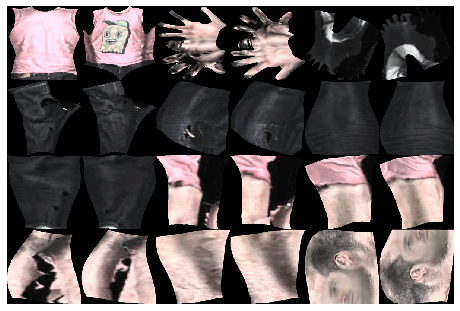

In [3]:
import numpy
import cv2
import matplotlib.pyplot as plt
import numpy as np
#
fig = plt.figure(figsize=[8,8])
Tex_Atlas = cv2.imread('../DensePoseData/demo_data/texture_from_SURREAL.png')[:,:,::-1]/255.
plt.imshow(Tex_Atlas.transpose([1,0,2]));plt.axis('off'); plt.show()
#
TextureIm  = np.zeros([24,200,200,3]);
#
for i in range(4):
    for j in range(6):
        TextureIm[(6*i+j) , :,:,:] = Tex_Atlas[ (200*j):(200*j+200)  , (200*i):(200*i+200) ,: ]

The texture above is obtained from the textures provided in the [SURREAL](https://www.di.ens.fr/willow/research/surreal/data/) dataset. 

One can basically design their own textures on the provided texture images. We provide the white surface and black edges as the texture atlas guide, which is visualized below.

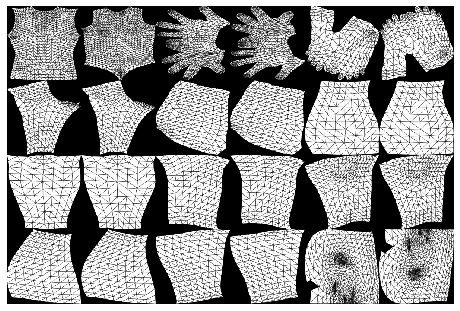

In [7]:
fig = plt.figure(figsize=[8,8])
Tex_Atlas = cv2.imread('../DensePoseData/demo_data/texture_atlas_200.png')[:,:,::-1]
plt.imshow(Tex_Atlas.transpose([1,0,2]));plt.axis('off'); plt.show()

Herein, we define the function to transfer the texture to the image domain.

In [8]:
def TransferTexture(TextureIm,im,IUV):
    U = IUV[:,:,1]
    V = IUV[:,:,2]
    #
    R_im = np.zeros(U.shape)
    G_im = np.zeros(U.shape)
    B_im = np.zeros(U.shape)
    ###
    for PartInd in range(1,25):    ## Set to xrange(1,23) to ignore the face part.
        tex = TextureIm[PartInd-1,:,:,:].squeeze() # get texture for each part.
        #####
        R = tex[:,:,0]
        G = tex[:,:,1]
        B = tex[:,:,2]
        ###############
        x,y = np.where(IUV[:,:,0]==PartInd)
        u_current_points = U[x,y]   #  Pixels that belong to this specific part.
        v_current_points = V[x,y]
        ##
        r_current_points = R[((255-v_current_points)*199./255.).astype(int),(u_current_points*199./255.).astype(int)]*255
        g_current_points = G[((255-v_current_points)*199./255.).astype(int),(u_current_points*199./255.).astype(int)]*255
        b_current_points = B[((255-v_current_points)*199./255.).astype(int),(u_current_points*199./255.).astype(int)]*255
        ##  Get the RGB values from the texture images.
        R_im[IUV[:,:,0]==PartInd] = r_current_points
        G_im[IUV[:,:,0]==PartInd] = g_current_points
        B_im[IUV[:,:,0]==PartInd] = b_current_points
    generated_image = np.concatenate((B_im[:,:,np.newaxis],G_im[:,:,np.newaxis],R_im[:,:,np.newaxis]), axis =2 ).astype(np.uint8)
    BG_MASK = generated_image==0
    generated_image[BG_MASK] = im[BG_MASK]  ## Set the BG as the old image.
    return generated_image

Let's read an IUV file obtained by rendering the SMPL model and transfer the texture!

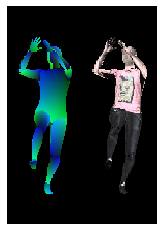

In [9]:
IUV = cv2.imread('../DensePoseData/demo_data/synth_UV_example.png')
im  = np.zeros(IUV.shape)
##
image = TransferTexture(TextureIm,im,IUV)
##
plt.imshow( np.hstack((IUV,image[:,:,::-1]))); plt.axis('off'); plt.show()

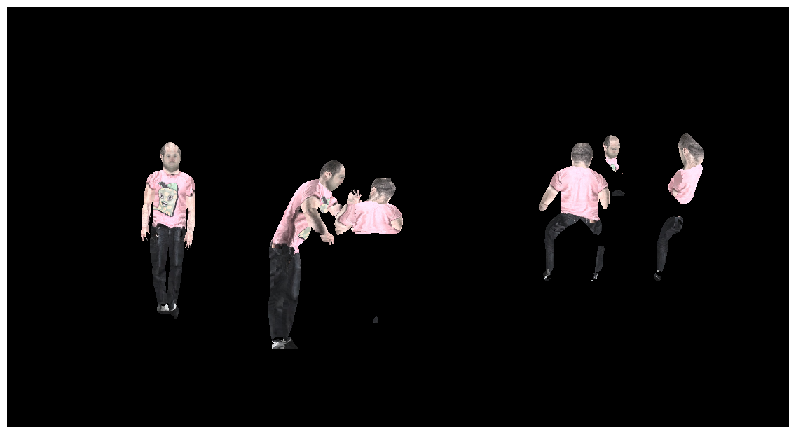

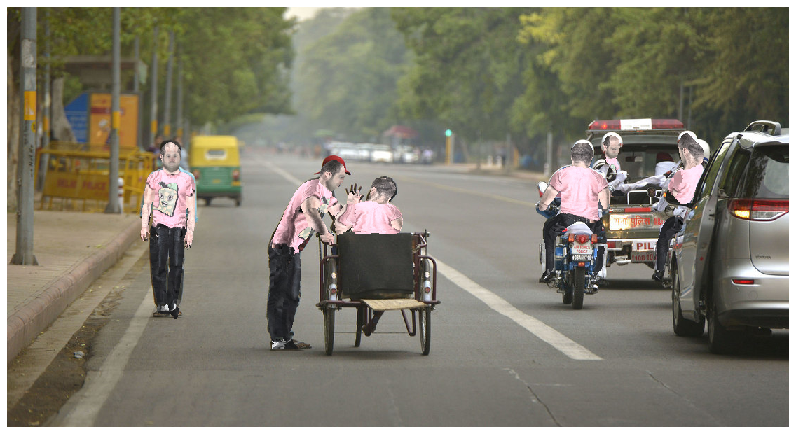

In [10]:
IUV = cv2.imread('../DensePoseData/infer_out/demo_im_IUV.png')
im  = cv2.imread('../DensePoseData/demo_data/demo_im.jpg')
#######
## Visualize the image with black background
image = TransferTexture(TextureIm,np.zeros(IUV.shape),IUV)
fig = plt.figure(figsize=[14,14])
plt.imshow(image[:,:,::-1]); plt.axis('off'); plt.show()
#######
## Visualize the image with the image as the background.
image = TransferTexture(TextureIm,im,IUV)
fig = plt.figure(figsize=[14,14])
plt.imshow(image[:,:,::-1]); plt.axis('off'); plt.show()

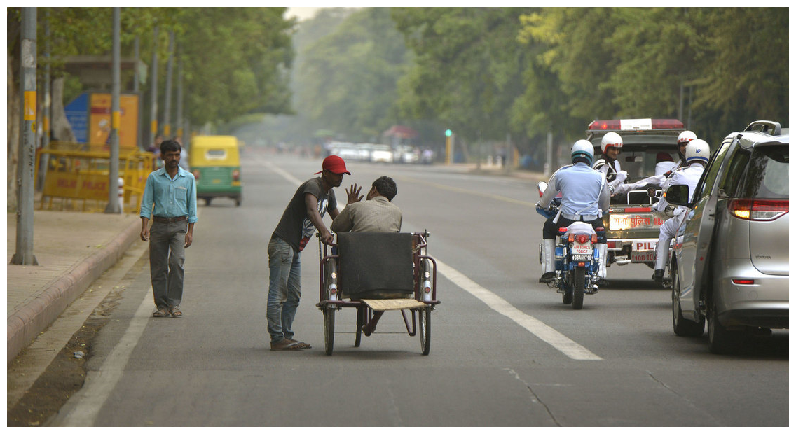

In [11]:
im  = cv2.imread('../DensePoseData/demo_data/demo_im.jpg')
plt.figure(figsize= [14,14])
plt.imshow(im[:,:,::-1]); plt.axis('off');plt.show()